## Семинар 2

# Тема: Построение 3D-графиков. Метод градиентного спуска

Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt

### Пример построения 3D-графика функции $z = x^2 + y^2$ на квадрате $[-10;10]\times[-10;10]$.

In [2]:
def z(x, y):
    return x**2 + y**2

In [3]:
N = 100
x = np.linspace(-10,10,N)
y = np.linspace(-10,10,N)
x_grid, y_grid = np.meshgrid(x, y)

In [7]:
x

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [13]:
x_grid

array([[-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       ...,
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ]])

In [17]:
z_grid = z(x_grid, y_grid)
z_grid

array([[200.        , 196.00040812, 192.08244057, ..., 192.08244057,
        196.00040812, 200.        ],
       [196.00040812, 192.00081624, 188.08284869, ..., 188.08284869,
        192.00081624, 196.00040812],
       [192.08244057, 188.08284869, 184.16488113, ..., 184.16488113,
        188.08284869, 192.08244057],
       ...,
       [192.08244057, 188.08284869, 184.16488113, ..., 184.16488113,
        188.08284869, 192.08244057],
       [196.00040812, 192.00081624, 188.08284869, ..., 188.08284869,
        192.00081624, 196.00040812],
       [200.        , 196.00040812, 192.08244057, ..., 192.08244057,
        196.00040812, 200.        ]])

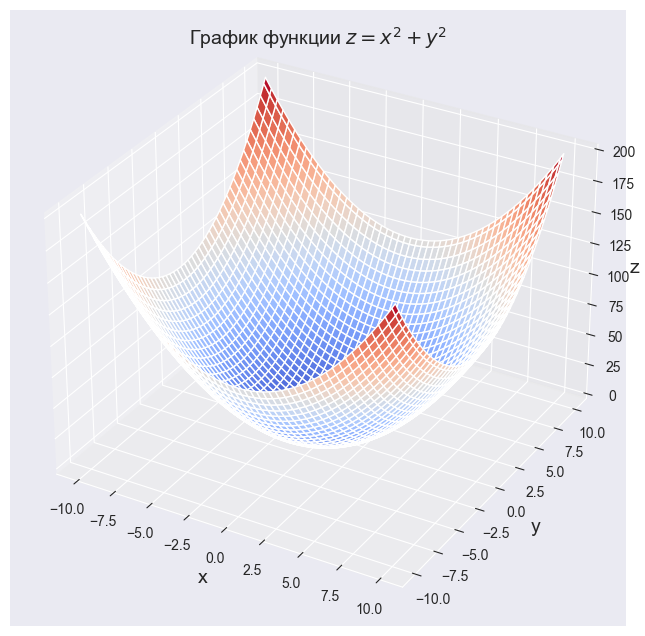

In [8]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm')

ax.set_title('График функции $z = x^2 + y^2$', fontsize=14, y = 1.01 )
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)

plt.show()

### Метод градиентного спуска
Функция $y = f(x_1, x_2,\dots , x_n)$ - непрерывно-дифференцируемая и выпукла.

Требуется найти некоторую точку $(x^{*}_1, x^{*}_2,\dots , x^{*}_n)$ локального минимума этой функции.

*Для применения метода градиентного спуска нужно выполнить следующие действия*:
1) Вычислить градиент функции: 
$\overrightarrow {grad f} = (\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2} , \dots,  \frac{\partial f}{\partial x_n})^T$
2) Задать начальное значение $(x^{0}_1, x^{0}_2,\dots , x^{0}_n)^T$

3) Задать скорость обучения (learning rate) $\alpha = \alpha_0$

4) Задать количество шагов градиентного спуска $k = k_0$

5) На каждом шаге менять все переменные, от которых зависит функция, по формуле:

$$\vec{x}^{j+1} = \vec{x}^{j} - \alpha \cdot \overrightarrow{grad f} (x_{1}^{j},x_{2}^{j},\dots ,x_{n}^{j}), j = 0, 1, ..., k_0 -1$$


### Пример нахождения точки минимума функции $f(w) =w ^ 2$ методом градиентного спуска.
Считаем, что точка минимума найдена, если значение производной в ней равно нулю с точностью 4-знака после запятой. Метод градиентного спуска может расходиться. Будем считать, что он расходится, если числа становятся велики (больше 1000000).

In [78]:
def derivative_f(w):
    return 2 * w

In [79]:
def Gradient_Discent(derivative_f, w_start, learning_rate=0.1, max_iter=100):
    """
    Реализация градиентного спуска для функций с одним локальным минимумом, совпадающим с глобальным.
    """
    w = w_start
    for _ in range(max_iter):
        w = w - learning_rate * derivative_f(w)
        #print( w, derivative_f(w))
    assert -1e+06 < w and w < 1e+06, "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
    assert -1e-04 < derivative_f(w) and derivative_f(w) < 1e-04, "Недостаточно шагов градиентного спуска"

    return w

In [80]:
w_min = Gradient_Discent(derivative_f, w_start=np.random.random(1))

In [81]:
np.round(w_min)

array([0.])

# Задания для самостоятельного выполнения

### 1. Задайте квадратную область на плоскости $[-5;5]\times[0;10]$ cеткой точек $10\times 10$. Визуализируйте эти точки на диаграмме рассеивания.
Указание: Используйте метод [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) библиотеки numpy. 

In [21]:
N = 10
x = np.linspace(-5, 5, N)
y = np.linspace(0,10, N)
x_grid, y_grid = np.meshgrid(x, y)

In [24]:
x

array([-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
        0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ])

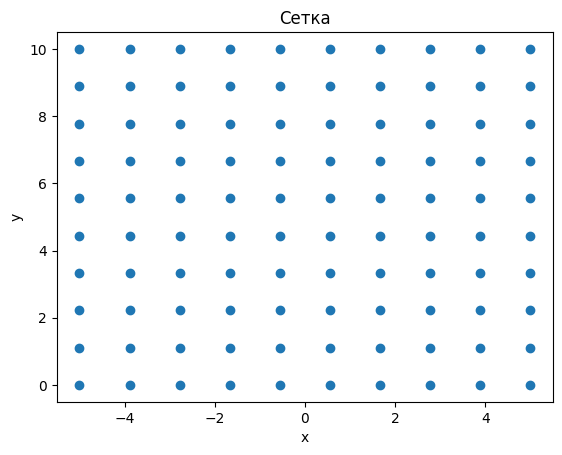

In [25]:
plt.scatter(x_grid, y_grid)
plt.title("Сетка")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

### 2. Запрограммируйте функцию $z = x^2 + (y - 5)^2 + 4$. Вычислите значения этой функции в точках, построенной сетки.

In [26]:
def f(x, y):
    return x ** 2 + (y - 5) ** 2 + 4

In [27]:
f_grid = f(x_grid, y_grid)

In [28]:
f_grid

array([[54.        , 44.12345679, 36.71604938, 31.77777778, 29.30864198,
        29.30864198, 31.77777778, 36.71604938, 44.12345679, 54.        ],
       [44.12345679, 34.24691358, 26.83950617, 21.90123457, 19.43209877,
        19.43209877, 21.90123457, 26.83950617, 34.24691358, 44.12345679],
       [36.71604938, 26.83950617, 19.43209877, 14.49382716, 12.02469136,
        12.02469136, 14.49382716, 19.43209877, 26.83950617, 36.71604938],
       [31.77777778, 21.90123457, 14.49382716,  9.55555556,  7.08641975,
         7.08641975,  9.55555556, 14.49382716, 21.90123457, 31.77777778],
       [29.30864198, 19.43209877, 12.02469136,  7.08641975,  4.61728395,
         4.61728395,  7.08641975, 12.02469136, 19.43209877, 29.30864198],
       [29.30864198, 19.43209877, 12.02469136,  7.08641975,  4.61728395,
         4.61728395,  7.08641975, 12.02469136, 19.43209877, 29.30864198],
       [31.77777778, 21.90123457, 14.49382716,  9.55555556,  7.08641975,
         7.08641975,  9.55555556, 14.49382716

### 3. Постройте 3D-график функции  $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$, используя построенную сетку. Изобразите на графике и саму сетку.
Указание: Для изображения сетки используйте метод [scatter3D](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html), указав по третьей координате нули.

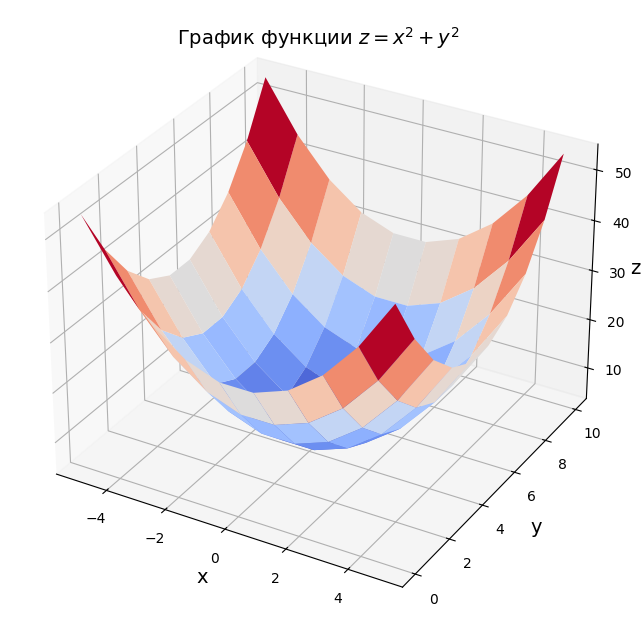

In [29]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, f_grid, cmap='coolwarm')

ax.set_title('График функции $z = x^2 + y^2$', fontsize=14, y = 1.01 )
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)

plt.show()

### 4. Постройте 3D-график функции $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$, используя более мелкую сетку размера $100\times 100$. Саму сетку изображать не нужно. Поменяйте угол обзора графика.
Указание: При помощи ax.view_init(elev=35, azim=20) поменяйте угол обзора графика.

In [34]:
def z(x, y):
    return x**2 + (y-5)**2 + 4

In [35]:
N = 100
x = np.linspace(-5,5,N)
y = np.linspace(0,10,N)
x_grid, y_grid = np.meshgrid(x, y)

In [36]:
z_grid = z(x_grid, y_grid)

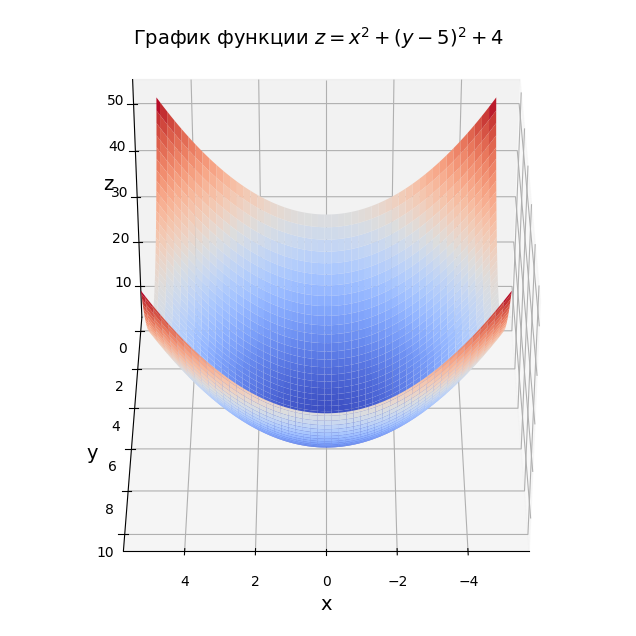

In [38]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm')

ax.set_title('График функции $z = x^2 + (y-5)^2 + 4$', fontsize=14, y = 1.01 )
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)

ax.view_init(elev=35, azim=90)

plt.show()

### 5. Постройте 2D-график линий уровня функции  $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$.
Указание: Используйте метод [contour](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html) библиотеки matplotlib.

In [39]:
N = 100
x = np.linspace(-5,5,N)
y = np.linspace(0,10,N)
x_grid, y_grid = np.meshgrid(x, y)

z_grid = z(x_grid, y_grid)


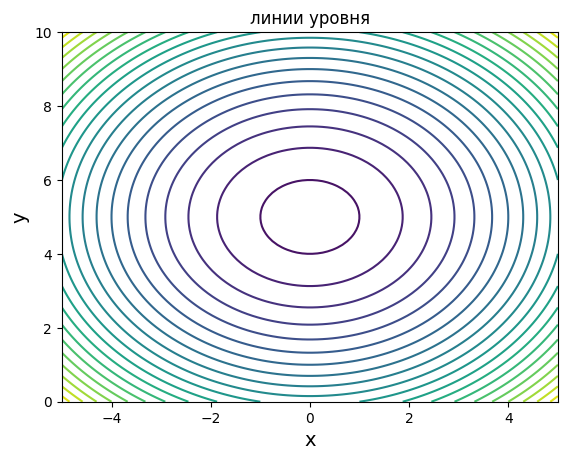

In [40]:
plt.contour(x_grid, y_grid, z_grid, levels= 20)
plt.title('линии уровня')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.show()

### 6. Постройте 3D-график линий уровня функции $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$.

In [41]:
N = 100
x = np.linspace(-5,5,N)
y = np.linspace(0,10,N)
x_grid, y_grid = np.meshgrid(x, y)

z_grid = z(x_grid, y_grid)

z_grid

array([[54.        , 53.00010203, 52.02061014, ..., 52.02061014,
        53.00010203, 54.        ],
       [53.00010203, 52.00020406, 51.02071217, ..., 51.02071217,
        52.00020406, 53.00010203],
       [52.02061014, 51.02071217, 50.04122028, ..., 50.04122028,
        51.02071217, 52.02061014],
       ...,
       [52.02061014, 51.02071217, 50.04122028, ..., 50.04122028,
        51.02071217, 52.02061014],
       [53.00010203, 52.00020406, 51.02071217, ..., 51.02071217,
        52.00020406, 53.00010203],
       [54.        , 53.00010203, 52.02061014, ..., 52.02061014,
        53.00010203, 54.        ]])

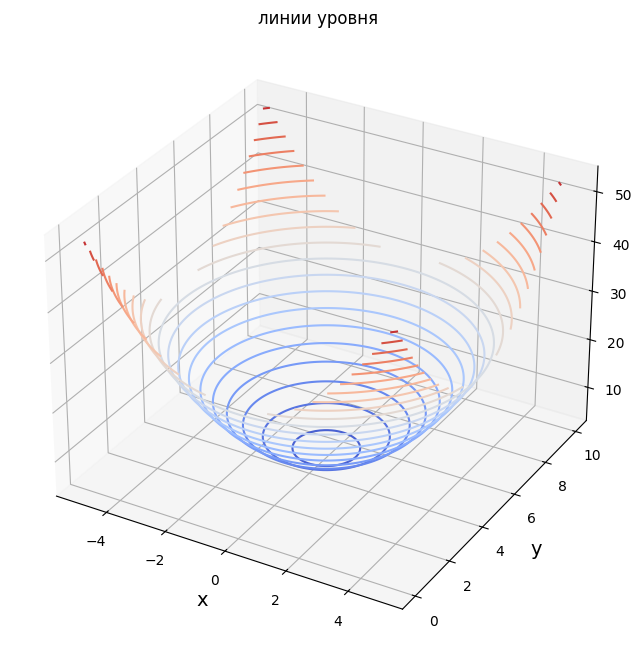

In [43]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(projection='3d')
ax.contour(x_grid, y_grid, z_grid, cmap='coolwarm', levels= 20)
plt.title('линии уровня')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()

### 7. Постройте на одном 3D-графике функцию $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$ и её линии уровня.
Указание: Для этого при построении поверхности укажите параметр прозрачности alpha=0.5.

In [44]:
N = 100
x = np.linspace(-5,5,N)
y = np.linspace(0,10,N)
x_grid, y_grid = np.meshgrid(x, y)

z_grid = z(x_grid, y_grid)


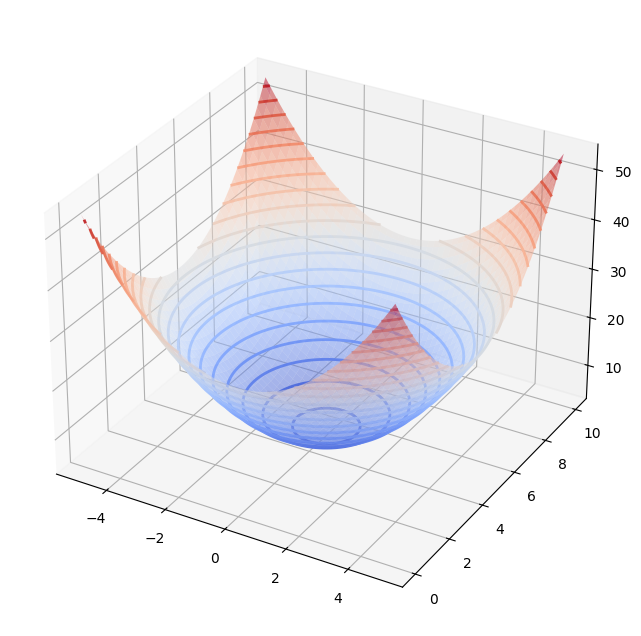

In [48]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm', alpha=0.5)

ax.contour(x_grid, y_grid, z_grid, cmap='coolwarm', levels= 20, linewidths=2)

plt.show()

### 8. Запрограммируйте функцию $f(w) =(w - 3 ) ^ 2$ и её производную. Вычислите значение функции и её производной в случайной точке.

In [50]:
def f(w):
    return (w - 3) ** 2

def df(dw):
    return 2 * (dw - 3)

In [52]:
f(np.random.uniform(-10, 10))


21.884136752195044

In [53]:
df(np.random.uniform(-10, 10))


3.5492584116227484

### 9. Методом градиентного спуска найдите точку минимума функции одной переменной $f(w) =(w - 3 ) ^ 2$.
Указание: Для этого напишите функцию GD_1d, принимающую на вход производную функции одной переменной, начальную точуку, скорость обучения, количество шагов и реализующую метод градиентного спуска. Пусть эта функция возвращает не только саму точку минимума, а numpy-массив значений x на каждом шаге градиентного спуска.

In [55]:
def derivative_f(w):
    return 2 * (w -3)

In [56]:
def GD_1d(derivative_f, start, learning_rate=0.1, max_iter=100):
    w = start
    values = [w]
    for _ in range(max_iter):
        w = w - learning_rate * derivative_f(w)
        values.append(w)
        
    assert -1e+06 < w and w < 1e+06, "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
    assert -1e-04 < derivative_f(w) and derivative_f(w) < 1e-04, "Недостаточно шагов градиентного спуска"
    
    return w, np.array(values)


In [58]:
w_min, values = GD_1d(derivative_f, start=np.random.random(1))

In [59]:
w_min

array([3.])

In [60]:
values

array([[0.14893927],
       [0.71915142],
       [1.17532114],
       [1.54025691],
       [1.83220553],
       [2.06576442],
       [2.25261154],
       [2.40208923],
       [2.52167138],
       [2.61733711],
       [2.69386969],
       [2.75509575],
       [2.8040766 ],
       [2.84326128],
       [2.87460902],
       [2.89968722],
       [2.91974977],
       [2.93579982],
       [2.94863986],
       [2.95891188],
       [2.96712951],
       [2.97370361],
       [2.97896288],
       [2.98317031],
       [2.98653625],
       [2.989229  ],
       [2.9913832 ],
       [2.99310656],
       [2.99448525],
       [2.9955882 ],
       [2.99647056],
       [2.99717645],
       [2.99774116],
       [2.99819293],
       [2.99855434],
       [2.99884347],
       [2.99907478],
       [2.99925982],
       [2.99940786],
       [2.99952629],
       [2.99962103],
       [2.99969682],
       [2.99975746],
       [2.99980597],
       [2.99984477],
       [2.99987582],
       [2.99990066],
       [2.999

### 10. Визуализируйте процесс нахождения точки минимума функции $f(w) =(w - 3 ) ^ 2$ c learning_rate=0.1 и с learning_rate=0.9.
Указание: Для этого напишите функцию plot_GD_1d, принимающую на вход функцию одной переменной и шаги градиентного спуска, которая строит график этой функции и отмечает на нём точками шаги градиентного спуска, соединённые между собой пунктирной линией.

In [ ]:
def plot_GD_1d(learning_rate):
    
    _, coords = GD_1d(derivative_f, start=np.random.random(1), learning_rate=learning_rate, max_iter=100)

### 11. Запрограммируйте функцию $F(w_1,w_2) ={w_1}^2 + ({w_2} - 3)^2 + 1$, а также её градиент. Вычислите значение и градиент этой функции в случайной точке.

### 12. Реализуйте метод градиентного спуска и найдите точку минимума функции двух переменных $F(w_1,w_2) ={w_1}^2 + ({w_2} - 3)^2 + 1$.
Указание: Для этого модифицируйте функцию GD_1d в функцию GD_2d, принимающую на вход градиент, начальную точуку, скорость обучения, количество шагов и реализующую метод градиентного спуска. Обратите внимание, что стартовая точка теперь состоит из двух значений.

### 13. Визуализируйте процесс нахождения точки минимума функции $F(w_1,w_2) ={w_1}^2 + ({w_2} - 3)^2 + 1$, когда градиентный спуск реализуется с learning_rate = 0.2.
Указание: Для этого напишите функцию plot_GD_2d, которая принимает на вход функцию двух переменных и шаги градиентного спуска, а строит график этой функции с линиями уровня и отмечает на нём точки шагов градиентного спуска, соединённые между собой ломаной линией. Для наглядности в функции plot_GD_2d разверните пространственный график на угол с azim=0.

### 14. Визуализируйте процесс нахождения точки минимума функции $F(w_1,w_2) ={w_1}^2 + ({w_2} - 3)^2 + 1$, когда градиентный спуск реализуется с learning_rate = 0.8.

### 15. Методом градиентного спуска найдите минимум функции четырёх переменных  $F(w_1,w_2,w_3,w_4) ={w_1}^2 + ({w_2}+5*w_3)^2 + (2*w_4 - 3)^2 + 6$.
Указание: Для этого модифицируйте функцию GD_2d в функцию GD_nd применимую для функций n-переменных. Выводить нужно только точку минимума функции, а значения на каждом шаге - нет, т.к. визуализация в данном случае невозможна. Подберите необходимые значения learning_rate = 0.001 и max_iter=10000.

### 16. Найдите минимум функции c параметрами a и b $F(w_1, w_2, w_3, w_4, a, b) =a*{w_1}^2 + ({w_2}+5*w_3 + b)^2 + (2*w_4 - 3)^2 + 6$. методом градиентного спуска. В качестве значений параметров возьмите $a=5, b =-7$ и $a=-2, b =3$.

Указание: Добавьте в функцию GD_nd параметры a и b, назовите, полученную функцию GD.

### 17. Создайте класс GradientDiscent, реализующий метод градиентного спуска для функции $F(w_1, w_2, w_3, w_4, a, b) =a*{w_1}^2 + ({w_2}+5*w_3 + b)^2 + (2*w_4 - 3)^2 + 6$. Найдите минимумы при различных a и b.
Указание: Укажите в конструкторе класса атрибуты: w и количество итераций. Добавьте в класс методы gradient_F и GD. Создайте метод fit, который вызывает функцию GD.

### 18. Модифицируйте класс GradientDiscent в класс GradientDiscent_err, таким образом, чтобы алгоритм градиентного спуcка останавливался, когда искомое значение точки минимума перестаёт существенно меняться. Добавьте в класс атрибут, выводящий количество сделанных шагов.
Указание: Для этого в метод GD добавьте вычисление средней абсолютной ошибки изменения значений между предыдущим и последующим шагом. Если ошибка станет меньше некоторой заранее заданной очень маленькой величины (error_reduction=0.0000001) - выходите из цикла. 